Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.

— цена продажи (SalePrice, зависимая переменная),

— наземная жилая зона (GrLivArea),

— общее качество (Overall Quality),

— территория гаража (GarageArea),

— условия сделки (SaleCondition).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [345]:
import numpy as np
import pandas as pd


In [346]:
df = pd.read_csv("sales.csv")
df.head()

SalePrice  GrLivArea  GarageArea  OverallQual Street SaleCondition
0     208500       1710         548            7   Pave        Normal
1     181500       1262         460            6   Pave        Normal
2     223500       1786         608            7   Pave        Normal
3     140000       1717         642            7   Pave       Abnorml
4     250000       2198         836            8   Pave        Normal

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [348]:
df["Street"].describe()

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object

In [349]:
df["SaleCondition"].describe()

count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object

In [350]:
df.columns

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual', 'Street',
       'SaleCondition'],
      dtype='object')

In [351]:
X = df[['GrLivArea', 'GarageArea', 'OverallQual']]
y = df['SalePrice']

In [352]:
X.head()

GrLivArea  GarageArea  OverallQual
0       1710         548            7
1       1262         460            6
2       1786         608            7
3       1717         642            7
4       2198         836            8

#### проверим на парные зависимости

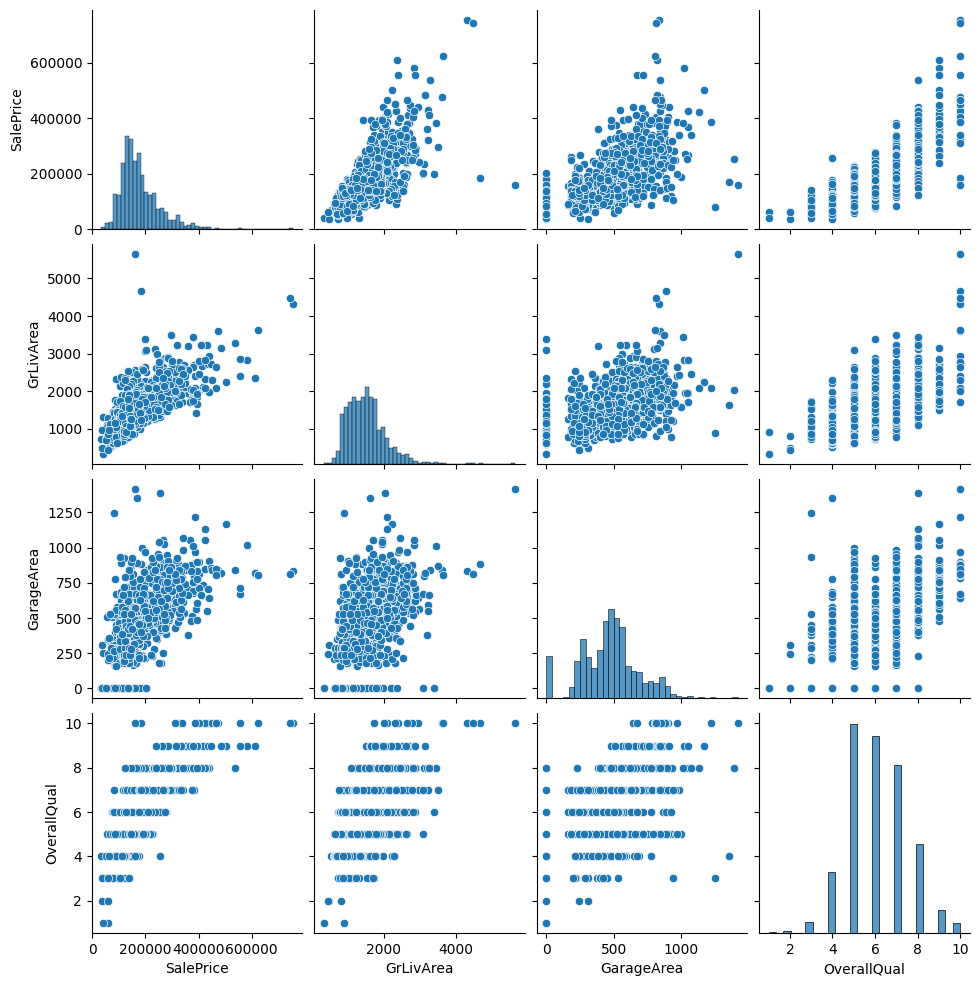

In [353]:
import seaborn as sns
sns.pairplot(df)

#### обнаружили, что цена имеет прямую корреляцию со всеми параметрами

#### проверим на 3d изображении:

In [354]:
import plotly.express as px
df_cut = df.sample(frac=0.3)
fig = px.scatter_3d(df_cut, x='GrLivArea', y='GarageArea', z='SalePrice', color='OverallQual')
fig.update_traces(marker_size = 5)
fig.update_layout(autosize=True,width=800,height=500,)
fig.show()


### **Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.**

In [355]:
X

GrLivArea  GarageArea  OverallQual
0          1710         548            7
1          1262         460            6
2          1786         608            7
3          1717         642            7
4          2198         836            8
...         ...         ...          ...
1455       1647         460            6
1456       2073         500            6
1457       2340         252            7
1458       1078         240            5
1459       1256         276            5

[1460 rows x 3 columns]

In [356]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [357]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 676 to 727
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GrLivArea    1168 non-null   int64
 1   GarageArea   1168 non-null   int64
 2   OverallQual  1168 non-null   int64
dtypes: int64(3)
memory usage: 36.5 KB


In [358]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr = lr_model.fit(X_train, y_train)
y_hat_test = lr.predict(X_test)

In [359]:
print(f"LinearRegression model coef: {dict(zip(X_train.columns, lr_model.coef_))}")
print(f"LinearRegression model bias: {lr_model.intercept_}")

LinearRegression model coef: {'GrLivArea': np.float64(49.75443516545533), 'GarageArea': np.float64(70.7204138805808), 'OverallQual': np.float64(27763.85355563156)}
LinearRegression model bias: -97213.40074872875


In [360]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MAE: = {mean_absolute_error(y_test, y_hat_test)}")
print(f"MSE: = {mean_squared_error(y_test, y_hat_test)}")

MAE: = 27182.872173711625
MSE: = 1451582072.1012416


#### попробуем избавиться от одной из переменных, чтобы можно было нарисовать 3d график

In [361]:
X = X.drop(columns=['GarageArea'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
lr_model = LinearRegression()
lr = lr_model.fit(X_train, y_train)
y_hat_test = lr.predict(X_test)
print(f"LinearRegression model coef: {dict(zip(X_train.columns, lr_model.coef_))}")
print(f"LinearRegression model bias: {lr_model.intercept_}")
print(f"MAE: = {mean_absolute_error(y_test, y_hat_test)}")
print(f"MSE: = {mean_squared_error(y_test, y_hat_test)}")

LinearRegression model coef: {'GrLivArea': np.float64(56.26504204000017), 'OverallQual': np.float64(32407.199913354998)}
LinearRegression model bias: -102041.59263639487
MAE: = 29958.827961134622
MSE: = 1675481194.6132143


####  при уменьшении размерности, ошибка MAE и MSE увеличивается

#### попробуем нарисовать 3d распределение тестовых данных и плоскость ЛинейнойРегрессии

In [362]:
import plotly.graph_objects as go
XX = X_test["OverallQual"]
YY = X_test["GrLivArea"]
ZZ = y_test
ZZ_lr = lr_model.intercept_ + lr_model.coef_[1] * XX + lr_model.coef_[0] * YY
# для плоскости необходимо создать двумерные массивы 
XX_2d, YY_2d = np.meshgrid(XX, YY)
ZZ_lr_2d = lr_model.intercept_ + lr_model.coef_[1] * XX_2d + lr_model.coef_[0] * YY_2d
# маркируем тестовые данные
marker_dict = dict(size=2, color=ZZ, opacity=0.8)
# предсказанные тестовые данные
marker_dict_lr = dict(size=5, color=ZZ, opacity=0.5)
fig = go.Figure(data=[go.Surface(z=ZZ_lr_2d, x=XX_2d, y=YY_2d, opacity=0.01, colorbar_x=-0.07), 
                      go.Scatter3d(z=ZZ, x=XX, y=YY, mode='markers', marker=marker_dict),
                      go.Scatter3d(z=ZZ_lr, x=XX, y=YY, mode='markers', marker=marker_dict_lr)])
fig.update_layout(title='House Price', autosize=True,
                  width=600, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()





### **Выводы: Таким образом, на графике четко видно, что модель ЛинейнойРегрессии очень хорошо предсказывает значения цены при маленьких значениях, но плохо при высокой цене квартиры.**